In [1]:
import pandas as pd

In [2]:
filename1 = 'data/train_pos_full.txt'
with open(filename1) as f1:
    train_pos = f1.readlines()

In [3]:
filename2 = 'data/train_neg_full.txt'
with open(filename2, encoding="utf8") as f2:
    train_neg = f2.readlines()

# Is there Duplicate ?

In [4]:
#Remove duplciate positive tweets
train_pos_without_duplicate = list(dict.fromkeys(train_pos))
len(train_pos_without_duplicate)

1127644

In [5]:
#Remove duplciate positive tweets
train_neg_without_duplicate = list(dict.fromkeys(train_neg))
len(train_neg_without_duplicate)

1142838

# Most common Words 

In [6]:
def most_common_words(sentence,nbr):
    words = sentence.split()

    # Create a dictionary to hold the count of each word
    word_count = {}

    # Iterate over the list of words and increment the count for each word
    for word in words:
        if word in word_count:
            word_count[word] += 1
        else:
            word_count[word] = 1

    # Sort the dictionary by the count of each word in descending order
    sorted_word_count = sorted(word_count.items(), key=lambda x: x[1], reverse=True)

    # Output a list of tuples with the words and their counts
    word_count_list = [(word, count) for (word, count) in sorted_word_count]

    return word_count_list[:nbr]

In [7]:
train_pos_class = []

#Put each positive tweet in lower case in its own list with correct label (1)
for line in train_pos:
    train_pos_class.append([line.lower(),1])

In [8]:
train_neg_class = []

#Put each negative tweet in lower case in its own list with correct label (0)
for line in train_neg:
    train_neg_class.append([line.lower(),0])

In [9]:
pos_df = pd.DataFrame(train_pos_class)
pos_df.columns = ["text", "cat_label"]

neg_df = pd.DataFrame(train_neg_class)
neg_df.columns = ["text", "cat_label"]

In [10]:
whole_pos = " ".join(pos_df.text.values)
word_pos_rep = most_common_words(whole_pos,10)
word_pos_rep

[('<user>', 1027186),
 ('!', 633599),
 ('i', 456072),
 ('you', 400487),
 ('.', 387394),
 ('to', 346757),
 (',', 342877),
 ('the', 327183),
 ('a', 266343),
 ('and', 213979)]

In [11]:
whole_neg = " ".join(pos_df.text.values)
word_neg_rep = most_common_words(whole_neg,10)
word_neg_rep

[('<user>', 1027186),
 ('!', 633599),
 ('i', 456072),
 ('you', 400487),
 ('.', 387394),
 ('to', 346757),
 (',', 342877),
 ('the', 327183),
 ('a', 266343),
 ('and', 213979)]

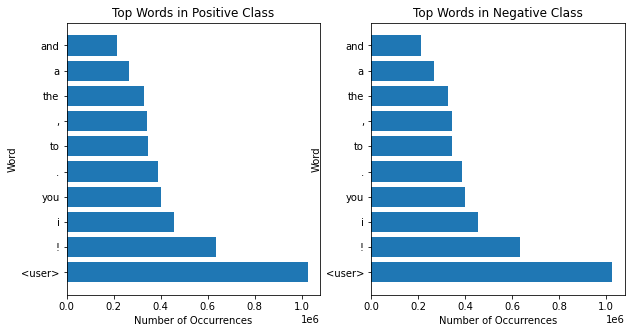

In [12]:
import matplotlib.pyplot as plt

# Define the data for the positive and negative classes
positive_words = word_pos_rep
negative_words = word_neg_rep

# Extract the word counts and words from the tuples
positive_counts = [count for word, count in positive_words]
positive_words = [word for word, count in positive_words]
negative_counts = [count for word, count in negative_words]
negative_words = [word for word, count in negative_words]

# Create the figure and axes for the two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Create the bar chart for the positive class
ax1.barh(positive_words, positive_counts)

# Add labels and title for the positive class
ax1.set_xlabel("Number of Occurrences")
ax1.set_ylabel("Word")
ax1.set_title("Top Words in Positive Class")

# Create the bar chart for the negative class
ax2.barh(negative_words, negative_counts)

# Add labels and title for the negative class
ax2.set_xlabel("Number of Occurrences")
ax2.set_ylabel("Word")
ax2.set_title("Top Words in Negative Class")

# Show the plots
plt.show()

# Distribution of the length of tweets

In [13]:
lst_len_pos = [len(x) for x in pos_df["text"]]
lst_len_neg = [len(x) for x in neg_df["text"]]

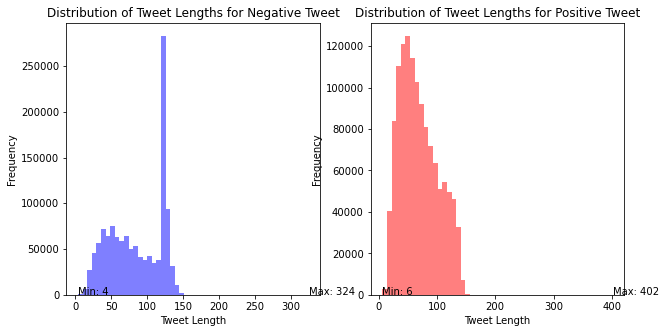

In [14]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Use NumPy to compute the histogram and statistics for the first list
hist1, bins1 = np.histogram(lst_len_neg, bins=50)
min_length1 = np.min(lst_len_neg)
max_length1 = np.max(lst_len_neg)
std_dev1 = np.std(lst_len_neg)

# Use NumPy to compute the histogram and statistics for the second list
hist2, bins2 = np.histogram(lst_len_pos, bins=50)
min_length2 = np.min(lst_len_pos)
max_length2 = np.max(lst_len_pos)
std_dev2 = np.std(lst_len_pos)

# Create the figure and axes for the two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# plot the histogram for the first list using Matplotlib
ax1.hist(lst_len_neg, bins=bins1, color='blue', alpha=0.5)

# add labels, title, and statistics for the first list
ax1.set_xlabel('Tweet Length')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Tweet Lengths for Negative Tweet')
ax1.text(min_length1, 0, 'Min: {}'.format(min_length1))
ax1.text(max_length1, 0, 'Max: {}'.format(max_length1))

# plot the histogram for the second list using Matplotlib
ax2.hist(lst_len_pos, bins=bins2, color='red', alpha=0.5)

# add labels, title, and statistics for the second list
ax2.set_xlabel('Tweet Length')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Tweet Lengths for Positive Tweet')
ax2.text(min_length2, 0, 'Min: {}'.format(min_length2))
ax2.text(max_length2, 0, 'Max: {}'.format(max_length2))

# show the plots
plt.show()


# Effect of our Preprocessing on these metrics

In [15]:
from preprocessing import*

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Famaqo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Famaqo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Famaqo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [16]:
pos_df_clean = clean_data(pos_df)
neg_df_clean = clean_data(neg_df)

Cleaning Data Start
Clean_tweet DONE
Lemmatization DONE
Concatenate DONE
Remove digit DONE
Remove single letter
Cleaning Data Start
Clean_tweet DONE
Lemmatization DONE
Concatenate DONE
Remove digit DONE
Remove single letter


In [17]:
pos_df_clean

,text,cat_label
0,justin read mention justin god know hope follow believe,1
1,logic dumb wont even crop name photo tsk,1
2,put casper box looved battle crakkbitch,1
3,thanks sir trip lil mama keep doin ya thang,1
4,visiting brother tmr bestest birthday gift eveerrr,1
...,...,...
1249995,warning sign negativity bleed toward others gradually cripple happiness,1
1249996,ff youuu,1
1249997,love shumpa thats girl,1
1249998,best way start matter happens make heart smile,1


In [18]:
neg_df_clean

,text,cat_label
0,vinco tresorpack difficulty object disassemble reassemble wooden piece beautiful wo,0
1,glad dot taks tomorrow thankful startho,0
2,celtic regular season fucked play playoff,0
3,could actually kill girl sorry,0
4,find hard believe afraid,0
...,...,...
1249995,sorry guy ridiculous,0
1249996,find food coloring anywhere,0
1249997,tort wonder chose crime module hahaa trying impressing someone,0
1249998,keyless entry remote fob clicker buick lacrosse must programmed buick dealer price,0


# Most common words after preprocessing

In [19]:
whole_neg_clean = " ".join(neg_df_clean.text.values)
word_neg_rep_clean = most_common_words(whole_neg_clean,10)
word_neg_rep_clean

[('want', 44830),
 ('miss', 41971),
 ('time', 34388),
 ('love', 34244),
 ('pack', 32154),
 ('see', 31616),
 ('complete', 31239),
 ('black', 31221),
 ('please', 31169),
 ('picture', 30802)]

In [20]:
word_pos_clean = " ".join(pos_df_clean.text.values)
word_pos_rep_clean = most_common_words(word_pos_clean,10)
word_pos_rep_clean

[('love', 94384),
 ('good', 71882),
 ('follow', 70570),
 ('thanks', 63227),
 ('please', 50179),
 ('haha', 42547),
 ('see', 41423),
 ('back', 40468),
 ('time', 38864),
 ('got', 35113)]

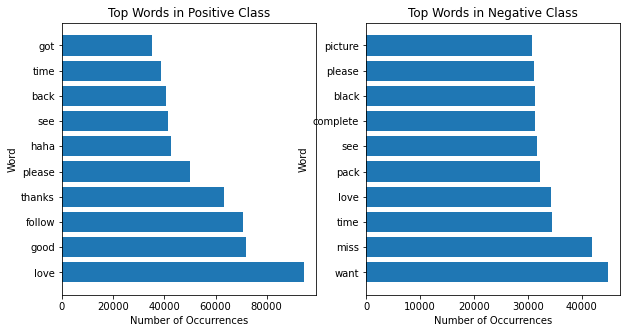

In [21]:
import matplotlib.pyplot as plt

# Define the data for the positive and negative classes
positive_words = word_pos_rep_clean
negative_words = word_neg_rep_clean

# Extract the word counts and words from the tuples
positive_counts = [count for word, count in positive_words]
positive_words = [word for word, count in positive_words]
negative_counts = [count for word, count in negative_words]
negative_words = [word for word, count in negative_words]

# Create the figure and axes for the two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Create the bar chart for the positive class
ax1.barh(positive_words, positive_counts)

# Add labels and title for the positive class
ax1.set_xlabel("Number of Occurrences")
ax1.set_ylabel("Word")
ax1.set_title("Top Words in Positive Class")

# Create the bar chart for the negative class
ax2.barh(negative_words, negative_counts)

# Add labels and title for the negative class
ax2.set_xlabel("Number of Occurrences")
ax2.set_ylabel("Word")
ax2.set_title("Top Words in Negative Class")

# Show the plots
plt.show()

# Distribution of tweets length after preprocessing

In [22]:
lst_len_pos_clean = [len(x) for x in pos_df_clean["text"]]
lst_len_neg_clean = [len(x) for x in neg_df_clean["text"]]

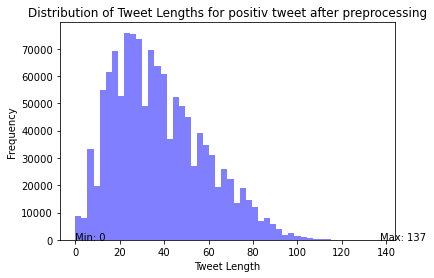

In [24]:
hist, bins = np.histogram(lst_len_pos_clean, bins=50)
min_length = np.min(lst_len_pos_clean)
max_length = np.max(lst_len_pos_clean)
std_dev = np.std(lst_len_pos_clean)

# plot the histogram using Matplotlib
plt.hist(lst_len_pos_clean, bins=bins, color='blue', alpha=0.5)

# add labels, title, and statistics
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.title('Distribution of Tweet Lengths for positiv tweet after preprocessing')
plt.text(min_length, 0, 'Min: {}'.format(min_length))
plt.text(max_length, 0, 'Max: {}'.format(max_length))
#plt.text(std_dev, 0, 'Std Dev: {}'.format(std_dev))

# show the plot
plt.show()


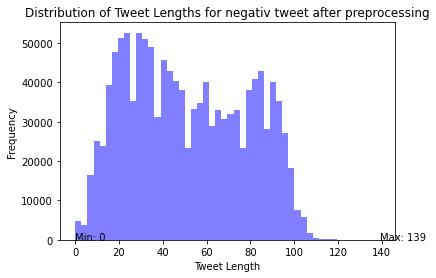

In [25]:
hist, bins = np.histogram(lst_len_neg_clean, bins=50)
min_length = np.min(lst_len_neg_clean)
max_length = np.max(lst_len_neg_clean)
std_dev = np.std(lst_len_neg_clean)

# plot the histogram using Matplotlib
plt.hist(lst_len_neg_clean, bins=bins, color='blue', alpha=0.5)

# add labels, title, and statistics
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.title('Distribution of Tweet Lengths for negativ tweet after preprocessing')
plt.text(min_length, 0, 'Min: {}'.format(min_length))
plt.text(max_length, 0, 'Max: {}'.format(max_length))
#plt.text(std_dev, 0, 'Std Dev: {}'.format(std_dev))

# show the plot
plt.show()